<a href="https://colab.research.google.com/github/piter239/seeker_tutorial/blob/main/Seeker_User_Manual_walkthrough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install insideopt-demo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 3.6 MB/s eta 0:00:00


In [11]:
# Can design in Python, page 6

import time # used for timing
import seekerdemo as skr

env = skr.Env("")

from math import pi

def f_volume(diameter, hight):
  return pi * hight * diameter ** 2 / 4

def f_surface(diameter, hight):
  return ( pi / 2 ) * diameter ** 2 + pi * diameter * hight

def main(volume):
  diameter = env.continuous(1e-6, 1e6)
  surface = ( pi / 2 ) * env.sqr(diameter) + (4 * volume ) / diameter
  # timelimit  in seconds , surface lowerbound is 0
  tl = 0.01
  l_bound = 0
  env.set_report(0.001) # report every 0.01 second

  print("start  minimization")
  start = time.time()
  # minimize surface
  env.minimize( surface , tl , l_bound)
  end = time.time()
  print(f"Execution time: {end - start:.8f} seconds")
  print ("done with minimization", env.get_status()," after ",env.get_number_evaluations(), " evals")
  #read final values
  optS = surface.get_value( )
  optD = diameter.get_value( )
  optH = 4 * volume / (pi * optD * optD )
  print( "Optimal Diameter =" , optD )
  print( "Optimal Height =" , optH )
  print(f"Optimal Surface  = {optS} / {f_surface(optD, optH)}")
  print(f"Volume = {volume} / {f_volume(optD, optH)}")
  #Terminate environment
  env.end( );


main(100)

start  minimization
At time 0.001006: Objective = 119.265421; Status = Feasible
At time 0.003273: Objective = 119.265421; Status = Feasible
At time 0.006349: Objective = 119.265421; Status = Feasible
At time 0.008270: Objective = 119.265421; Status = Feasible
Execution time: 0.01143169 seconds
done with minimization StatusType.timeout  after  1249  evals
Optimal Diameter = 5.0307860696563536
Optimal Height = 5.030815835559076
Optimal Surface  = 119.26542062203347 / 119.26542062203347
Volume = 100 / 100.00000000000001


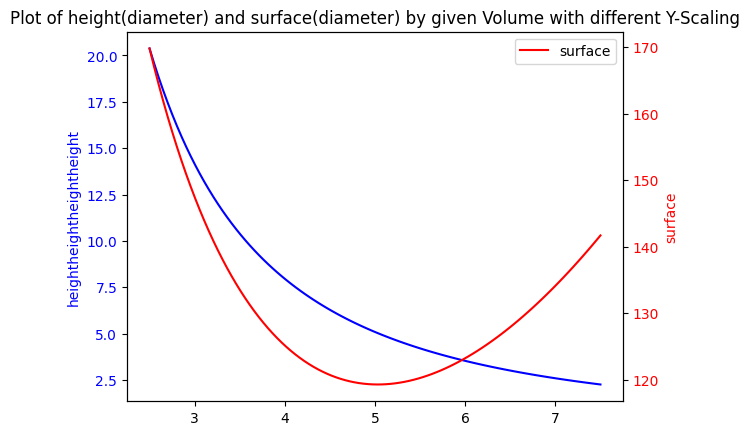

In [7]:
# plot values of 2 functions from one parameter on the same 2d plot
# with their own y-scaling from mininum to maximum
import matplotlib.pyplot as plt
import numpy as np
from math import pi

Volume = 100  # predefined volume

def height(diameter, volume = Volume):
  """ calculate hight bei given diameter and volume of cane"""
  return 4 * volume / pi / diameter ** 2

def surface(diameter, volume = Volume):
  """ calculate surface bei given diameter and volume of cane"""
  return pi / 2 * diameter ** 2 + 4 * volume / diameter


diameter_values = np.linspace(2.5, 7.5, 100)
height_values = height(diameter_values)
surface_values = surface(diameter_values)

# plt.plot(diameter_values, height_values, label="height")
# plt.plot(diameter_values, surface_values, label="surface")

# plt.xlabel("x")
# plt.ylabel("y")
# plt.title("Plot of Two Functions")
# plt.legend()
# plt.show()

fig, ax1 = plt.subplots()

ax1.plot(diameter_values, height_values, label="height", color="blue")
ax1.set_ylabel("height", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

ax2 = ax1.twinx()
ax2.plot(diameter_values, surface_values, label="surface", color="red")

ax2.set_ylabel("surface", color="red")
ax2.tick_params(axis='y', labelcolor="red")

plt.xlabel("diameter")
plt.title("Plot of height(diameter) and surface(diameter) by given Volume with different Y-Scaling")
plt.legend()
plt.show()

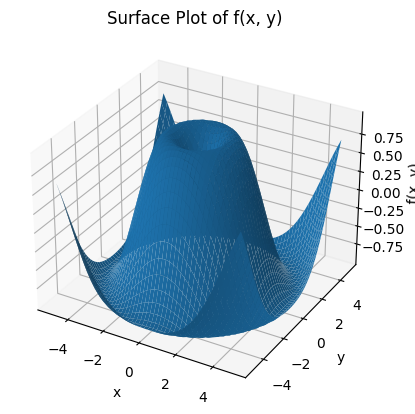

In [8]:
# TODO
# This is not useful in our case - for future usage
# Visualize by plotting 3d surface as a function from 2 variables

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function to be plotted
def f(x, y):
    return np.sin(np.sqrt(x**2 + y**2))

# Create a grid of points
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)

# Calculate the function values
Z = f(X, Y)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z)

# Add labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Surface Plot of f(x, y)')

# Show the plot
plt.show()
